In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

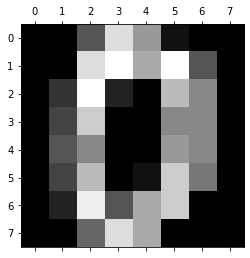

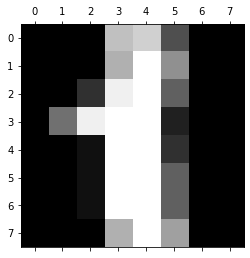

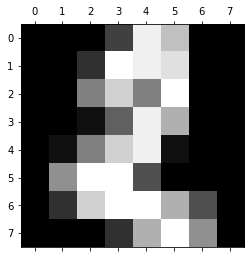

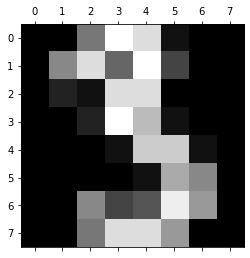

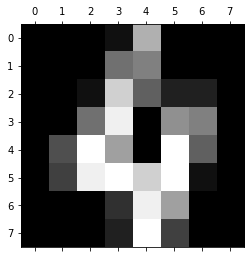

In [6]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [5]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [7]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

## Data can be used as x & target can be used as y

In [9]:
x=digits.data
y=digits.target

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [10]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
lreg.fit(x_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
lreg.score(x_test,y_test)

0.9611111111111111

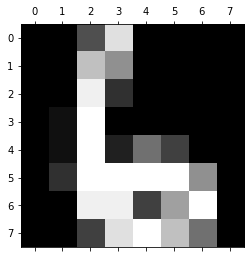

In [13]:
plt.matshow(digits.images[67])

In [14]:
digits.target[67]

6

In [16]:
lreg.predict([digits.data[67]])

array([6])

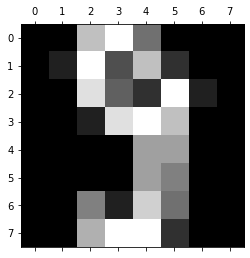

In [17]:
plt.matshow(digits.images[125])

In [18]:
digits.target[125]

9

In [19]:
lreg.predict([digits.data[125]])

array([9])

In [24]:
lreg.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

## Where predicted value is wrong??

In [27]:
y_predict = lreg.predict(x_test)
from sklearn.metrics import confusion_matrix as c_m

cm = c_m(y_test, y_predict)
cm

array([[29,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 29,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 46,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 28,  0,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0, 37,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 37,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 33,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 47,  1,  0],
       [ 0,  3,  0,  0,  0,  1,  0,  0, 22,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 38]], dtype=int64)

Text(69.0, 0.5, 'Truth')

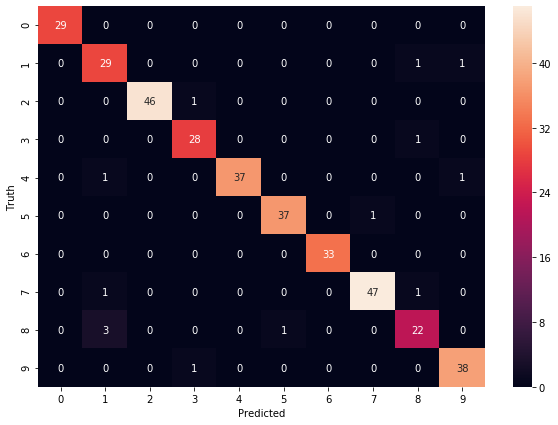

In [29]:
# For better visualization
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')